In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text
import matplotlib.tri as tri

from utils import (
    load_poisson2d_kernel_dataset, load_helmholtz2d_kernel_dataset,
    load_poisson2dhdomain_kernel_dataset, load_helmholtz2dhdomain_kernel_dataset,
    load_cos2d_kernel_dataset, load_cos2dhdomain_kernel_dataset)
from utils import relative_err

In [2]:
nTrain = 1000
nTest = 500
idx = 10

In [3]:
import matplotlib.tri as tri

In [8]:
def vis_2D_result(upath, domain, task, idx=10, sigma='5e-01', outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    ax3 = subfigs[2].subplots()

    if (task == 'poisson') & (domain == 'disk'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
            '../data', nTrain, nTest, res=20, sigma=sigma)
    elif (task == 'poisson') & (domain == 'h'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
            '../data', nTrain, nTest, res=30, sigma=sigma)
    elif (task == 'helmholtz') & (domain == 'disk'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
            '../data', nTrain, nTest, res=20, sigma=sigma)
    elif (task == 'helmholtz') & (domain == 'h'):
        fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
            '../data', nTrain, nTest, res=30, sigma=sigma)
    
    upred = np.load(upath, allow_pickle=True)
    rl2 = relative_err(upred, uTest)
    print(f"task : {task} - domain : {domain}")
    print("relative L2 : {:.4e}".format(rl2))

    if domain == 'disk':
        meshy_path = os.path.join('../data', 'mesh2D_disk_20.mat')
    elif domain == 'h':
        meshy_path = os.path.join('../data', 'mesh2D_h_30.mat')
        
    ys = scipy.io.loadmat(meshy_path)['X']
    tris = scipy.io.loadmat(meshy_path)['Tri']
    triang = tri.Triangulation(ys[:,0],ys[:,1],triangles=tris)
    print("# of nodes : {:}".format(ys.shape[0]))


    upred = upred[:,idx].reshape(-1)
    uref = uTest[:,idx].reshape(-1)
    uerr = np.abs(upred - uref)
    vmin = uref.min()
    vmax = uref.max()

    im = ax1.tricontourf(
        triang, uref, levels=np.linspace(vmin, vmax, 30), cmap='jet')
    ax1.set_aspect('equal')
    ax1.set_title('Reference')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$', rotation=0)
    ax1.set_xticklabels("")
    ax1.set_yticklabels("")
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_a = Text(0.01, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    im = ax2.tricontourf(
        triang, upred, levels=np.linspace(vmin, vmax, 30), cmap='jet')
    ax2.set_aspect('equal')
    ax2.set_title('Prediction')
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$', rotation=0)
    ax2.set_xticklabels("")
    ax2.set_yticklabels("")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_b = Text(0.01, 0.8, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)
    
    im = ax3.tricontourf(
        triang, uerr, levels=30, cmap='jet')
    ax3.set_aspect('equal')
    ax3.set_title('Absolute Error')
    ax3.set_xlabel('$x_1$')
    ax3.set_ylabel('$x_2$', rotation=0)
    ax3.set_xticklabels("")
    ax3.set_yticklabels("")
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = f.colorbar(im, cax=cax, orientation='vertical')
    cbar.locator = ticker.MaxNLocator(nbins=5)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.formatter.set_useMathText(True)
    label_c = Text(0.01, 0.8, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)

    plt.savefig(outnm)

Poisson Disk

load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
load ../data/poisson2D_disk_20_2e-01.mat
task : poisson - domain : disk
relative L2 : 8.5628e-04
# of nodes : 833


/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: divide by zero encountered in log
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))
/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: invalid value encountered in subtract
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))


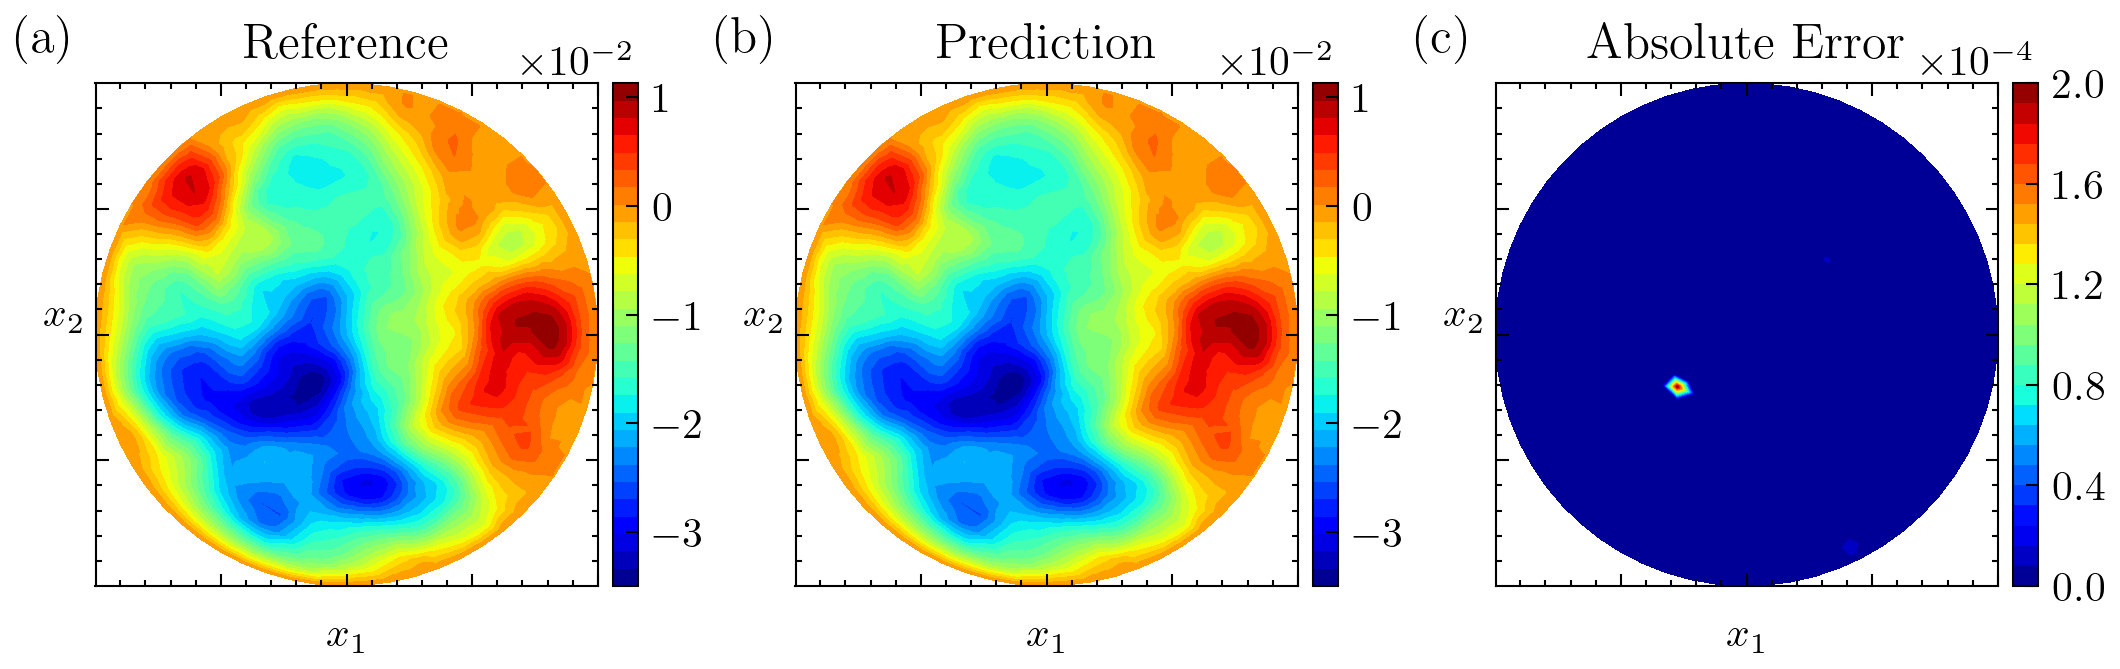

In [10]:
vis_2D_result(
    '../results/poisson2D/ogapw-512-1000-512-20-x-2e-01-relu/upred.npy', 
    'disk', 'poisson', 10, '2e-01', outnm='poisson2D.pdf')

Helmholtz Disk

load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
load ../data/helmholtz2D_disk_20_2e-01.mat
task : helmholtz - domain : disk
relative L2 : 1.6378e-04
# of nodes : 833


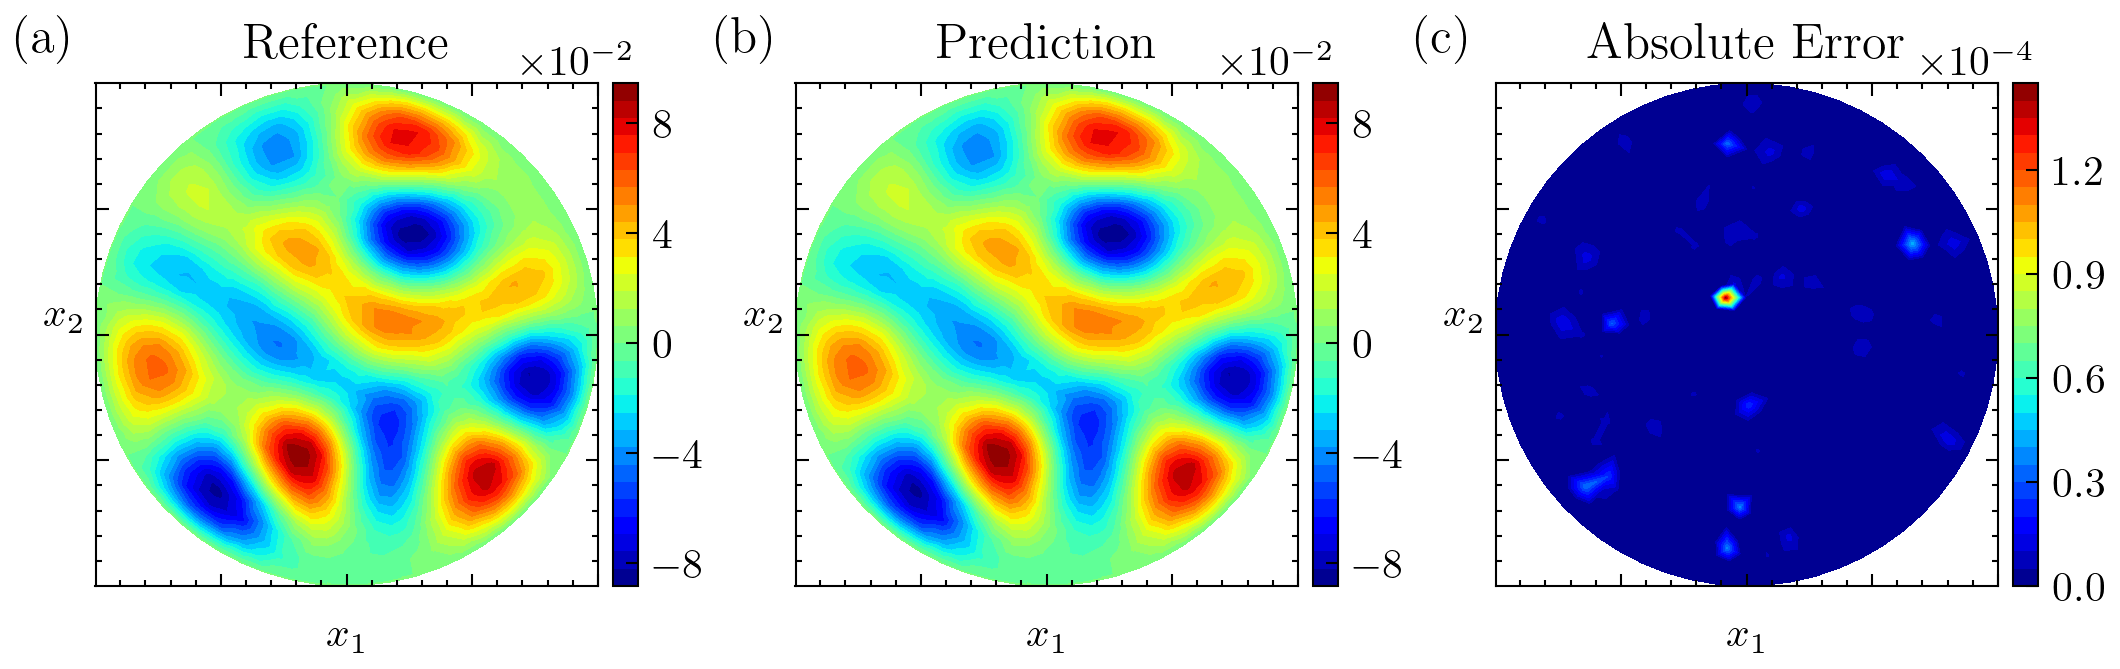

In [11]:
vis_2D_result(
    '../results/helmholtz2D/ogapw-512-1000-512-20-x-2e-01-relu/upred.npy', 
    'disk', 'helmholtz', 10, '2e-01',
    outnm='helmholtz2D.pdf')

Poisson H

load ../data/mesh2D_h_30.mat
load ../data/dat2D_h_30_2e-01.mat
load ../data/poisson2D_h_30_2e-01.mat
task : poisson - domain : h
relative L2 : 7.1716e-04
# of nodes : 997


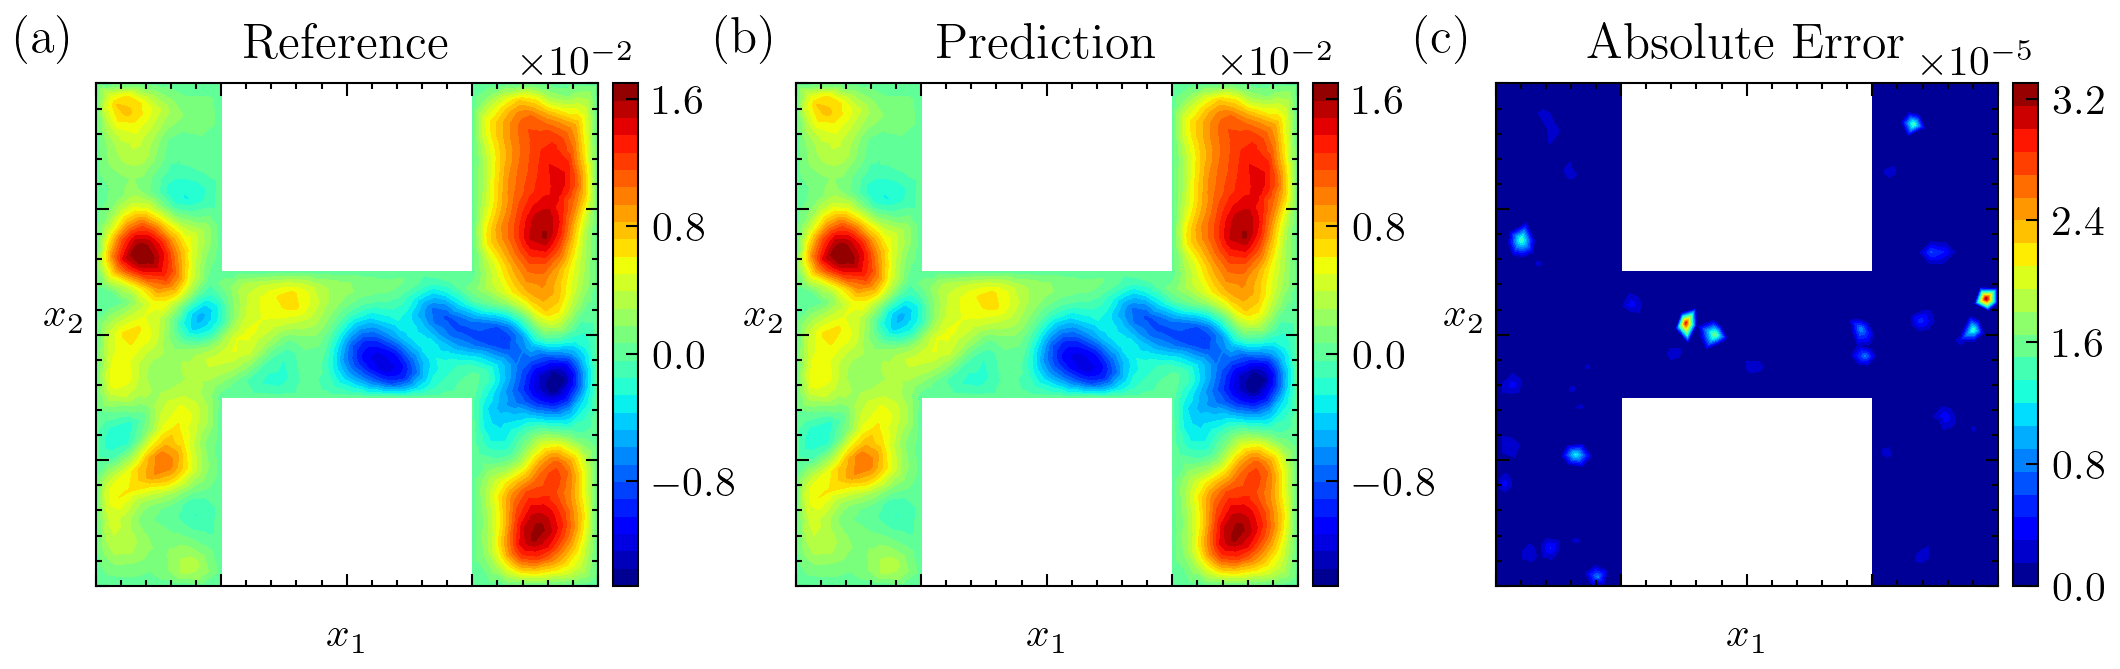

In [12]:
vis_2D_result(
    '../results/poisson2Dhdomain/ogapw-512-1000-512-30-x-2e-01-relu/upred.npy', 
    'h', 'poisson', idx, '2e-01',
    outnm='poisson2DH.pdf')

Helmholtz H

load ../data/mesh2D_h_30.mat
load ../data/dat2D_h_30_2e-01.mat
load ../data/helmholtz2D_h_30_2e-01.mat
task : helmholtz - domain : h
relative L2 : 2.6029e-03
# of nodes : 997


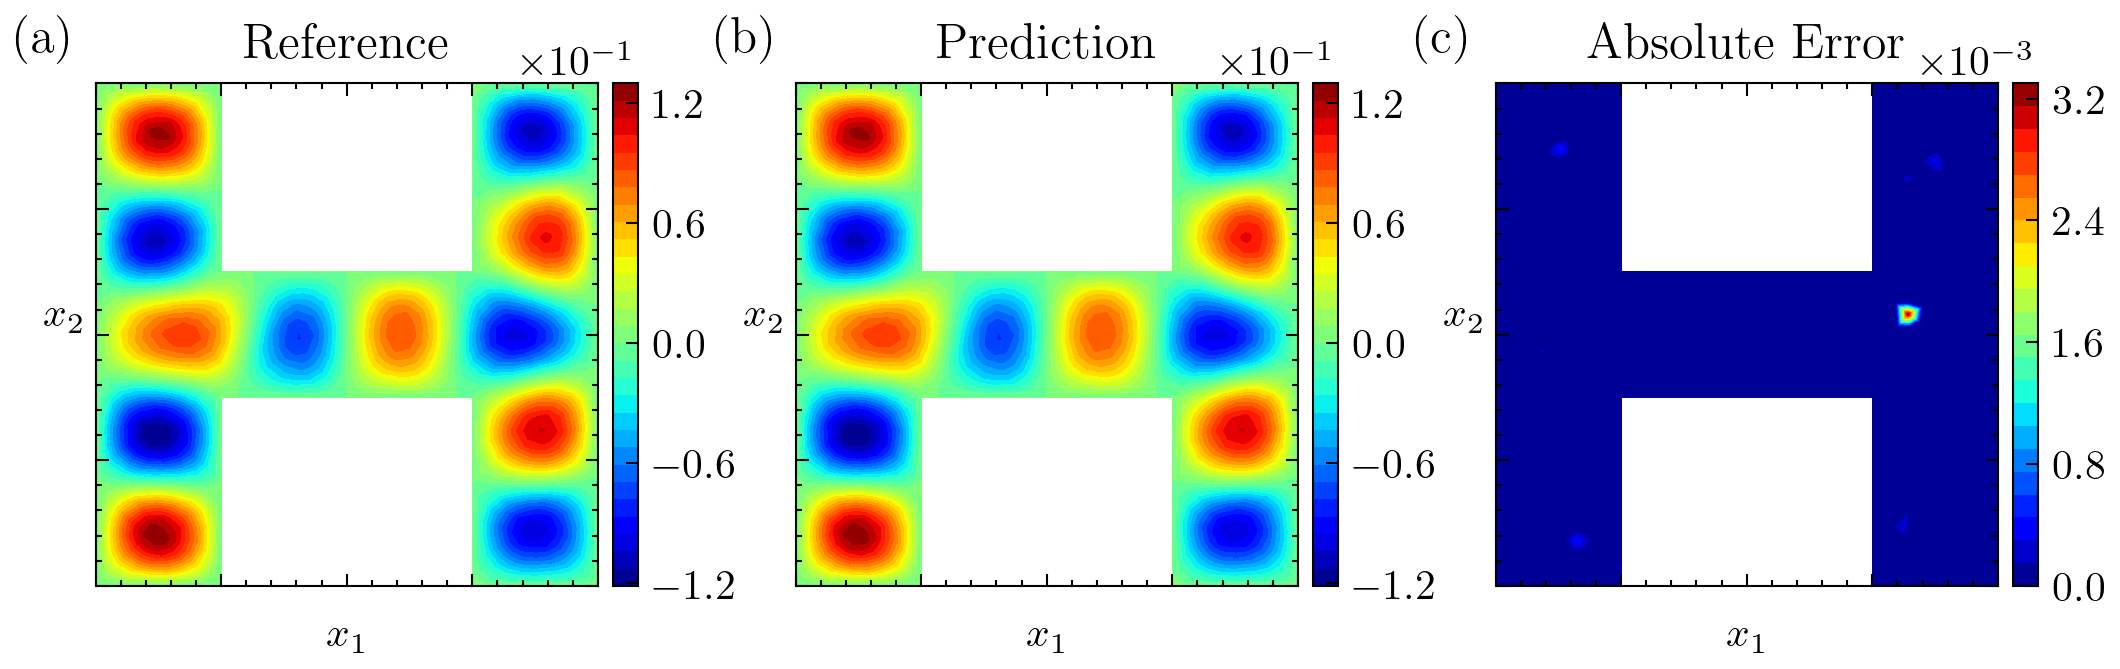

In [13]:
vis_2D_result(
    '../results/helmholtz2Dhdomain/ogapw-512-1000-512-30-x-2e-01-relu/upred.npy', 
    'h', 'helmholtz', 50, '2e-01',
    outnm='helmholtz2DH.pdf')

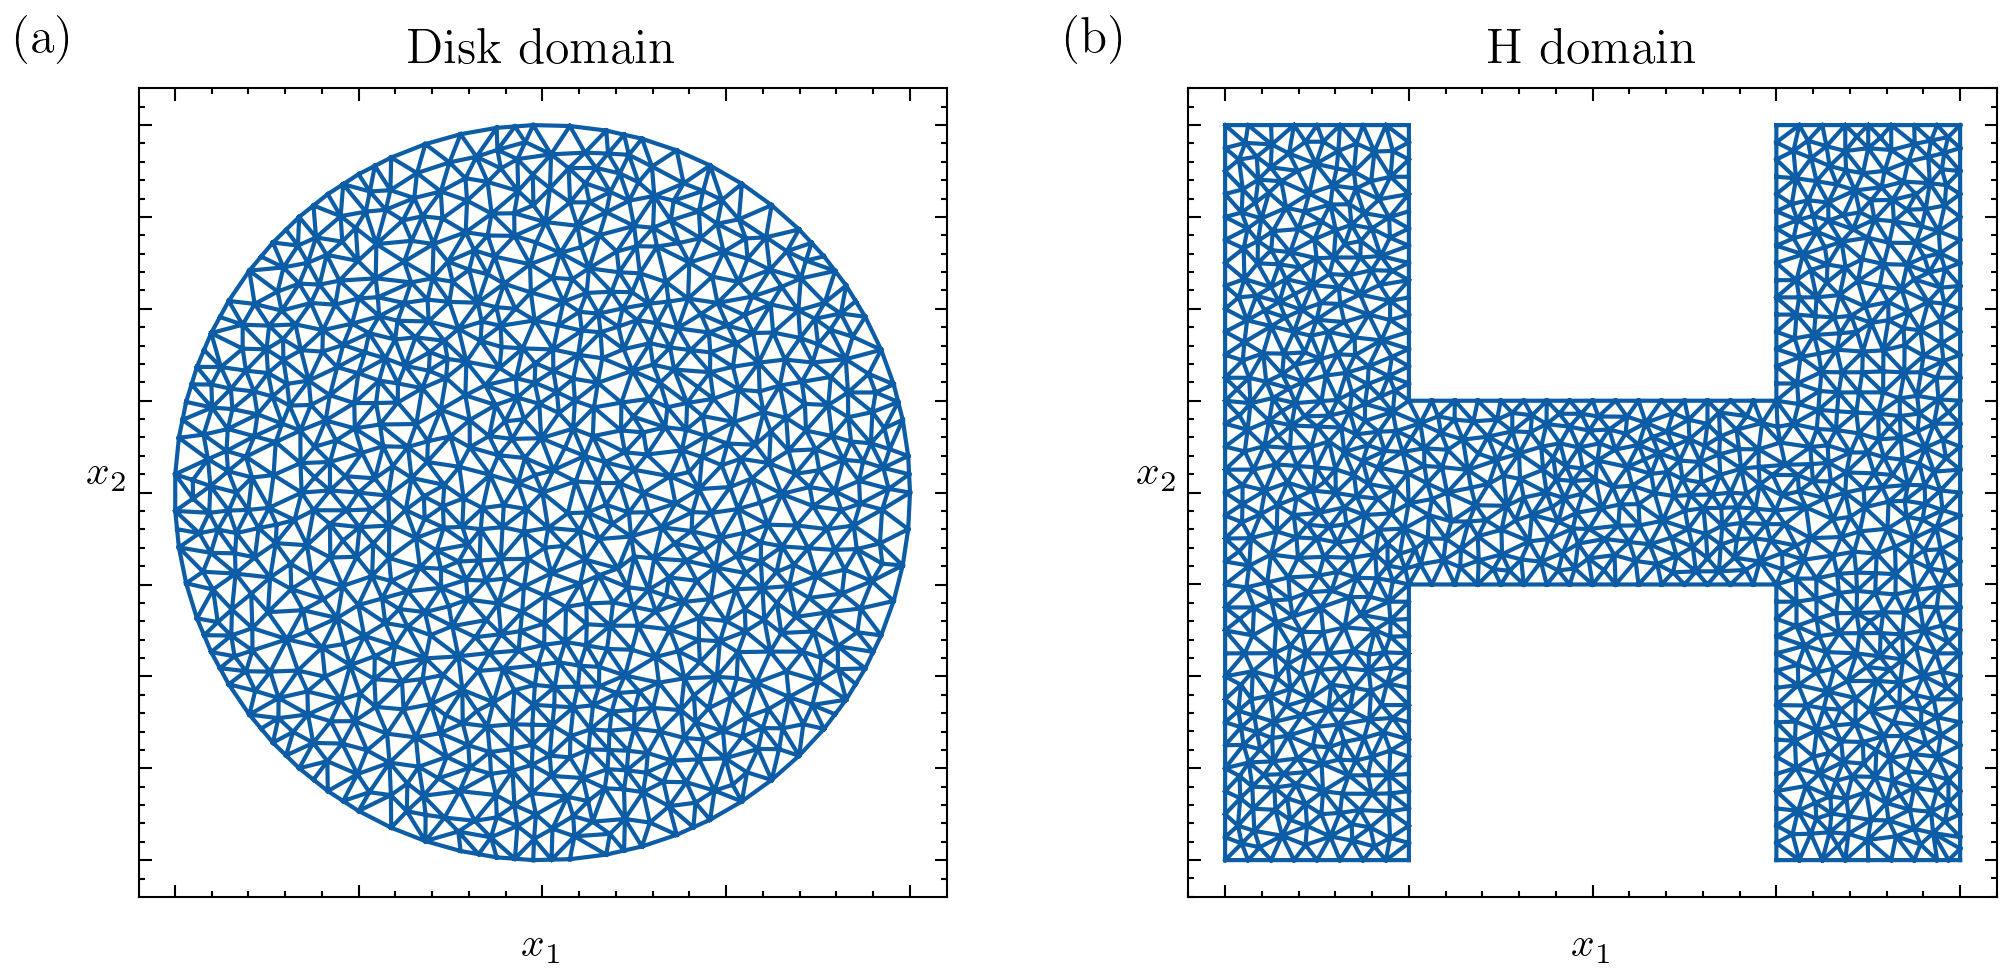

In [9]:
meshdisk_path = os.path.join('../data', 'mesh2D_disk_20.mat')
ys_disk = scipy.io.loadmat(meshdisk_path)['X']
tris_disk = scipy.io.loadmat(meshdisk_path)['Tri']
triang_disk = tri.Triangulation(ys_disk[:,0],ys_disk[:,1],triangles=tris_disk)

meshh_path = os.path.join('../data', 'mesh2D_h_30.mat')
ys_h = scipy.io.loadmat(meshh_path)['X']
tris_h = scipy.io.loadmat(meshh_path)['Tri']
triang_h = tri.Triangulation(ys_h[:,0], ys_h[:,1],triangles=tris_h)

cm = 1/2.54
f = plt.figure(figsize=(7,3.5))
subfigs = f.subfigures(1,2).flatten()
ax1 = subfigs[0].subplots()
ax2 = subfigs[1].subplots()

im = ax1.triplot(triang_disk, '-', lw=1)
ax1.set_aspect('equal')
ax1.set_title('Disk domain')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', rotation=0)
ax1.set_xticklabels("")
ax1.set_yticklabels("")
label_a = Text(0.01, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(label_a)

im = ax2.triplot(triang_h, '-', lw=1)
ax2.set_aspect('equal')
ax2.set_title('H domain')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', rotation=0)
ax2.set_xticklabels("")
ax2.set_yticklabels("")
label_b = Text(0.01, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(label_b)

plt.savefig('mesh2D.pdf')

In [65]:
def latexlog_compare(sigma='2e-01', nNeuron=128):

    fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
            '../data', nTrain, nTest, res=20, sigma=sigma)
    upredpath = f'../results/poisson2D/ogapw-{nNeuron}-1000-512-20-x-{sigma}-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_poisson = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
            '../data', nTrain, nTest, res=30, sigma=sigma)
    upredpath = f'../results/poisson2Dhdomain/ogapw-{nNeuron}-1000-512-30-x-{sigma}-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_poissonh = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
            '../data', nTrain, nTest, res=20, sigma=sigma)
    upredpath = f'../results/helmholtz2D/ogapw-{nNeuron}-1000-512-20-x-{sigma}-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_helmholtz = relative_err(upred, uTest)

    fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
        '../data', nTrain, nTest, res=30, sigma=sigma)
    upredpath = f'../results/helmholtz2Dhdomain/ogapw-{nNeuron}-1000-512-30-x-{sigma}-relu/upred.npy'
    upred = np.load(upredpath, allow_pickle=True)
    ogapw_helmholtzh = relative_err(upred, uTest)

    gl_poisson = np.load(f'../results/poisson2D/gl-10000-1000-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    gl_poissonh = np.load(f'../results/poisson2Dhdomain/gl-10000-1000-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    gl_helmholtz = np.load(f'../results/helmholtz2D/gl-10000-1000-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    gl_helmholtzh = np.load(f'../results/helmholtz2Dhdomain/gl-10000-1000-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'].min()

    don_poisson = np.min(np.load(f'../results/poisson2D/don-50000-1000-x-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_poissonh = np.min(np.load(f'../results/poisson2Dhdomain/don-50000-1000-x-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_helmholtz = np.min(np.load(f'../results/helmholtz2D/don-50000-1000-x-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'])
    don_helmholtzh = np.min(np.load(f'../results/helmholtz2Dhdomain/don-50000-1000-x-{sigma}/log.npy', allow_pickle=True).item()['utest_rl2'])
    
    oga_poisson = np.load(f'../results/poisson2D/oga-1024-1000-512-20-x-{sigma}-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    oga_poissonh = np.load(f'../results/poisson2Dhdomain/oga-1024-1000-512-30-x-{sigma}-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    oga_helmholtz = np.load(f'../results/helmholtz2D/oga-1024-1000-512-20-x-{sigma}-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    oga_helmholtzh = np.load(f'../results/helmholtz2Dhdomain/oga-1024-1000-512-30-x-{sigma}-relu/log.npy', allow_pickle=True).item()['utest_rl2'].min()
    
    print('OGApw & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(ogapw_poisson, ogapw_poissonh, ogapw_helmholtz, ogapw_helmholtzh))
    print('OGA & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(oga_poisson, oga_poissonh, oga_helmholtz, oga_helmholtzh))
    print('GL & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(gl_poisson, gl_poissonh, gl_helmholtz, gl_helmholtzh))
    print('DON & {:.4e} & {:.4e} & {:.4e} & {:.4e} \\\ '.format(don_poisson, don_poissonh, don_helmholtz, don_helmholtzh))

In [191]:
latexlog_compare(sigma='5e-01', nNeuron=512)

load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_5e-01.mat
load ../data/poisson2D_disk_20_5e-01.mat
load ../data/mesh2D_h_30.mat
load ../data/dat2D_h_30_5e-01.mat
load ../data/poisson2D_h_30_5e-01.mat
load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_5e-01.mat
load ../data/helmholtz2D_disk_20_5e-01.mat
load ../data/mesh2D_h_30.mat
load ../data/dat2D_h_30_5e-01.mat
load ../data/helmholtz2D_h_30_5e-01.mat
OGApw & 1.2181e-04 & 1.3940e-04 & 3.8062e-04 & 4.0820e-05 \\ 
OGA & 6.1819e-02 & 1.9443e-01 & 4.3587e-01 & 3.3949e-01 \\ 
GL & 1.1408e-02 & 2.6147e-02 & 6.0271e-02 & 1.0438e-01 \\ 
DON & 7.6432e-02 & 8.1483e-02 & 3.6353e-02 & 5.5144e-02 \\ 


Gauss 2D convergence rate from Kernel integral

In [23]:
# def vis_oga_gauss2D_dynamics(outnm=None):
#     cm = 1/2.54
#     f = plt.figure(figsize=(14,3.5))
#     subfigs = f.subfigures(1,4, wspace=.2)
#     ax1 = subfigs[0].subplots()
#     ax2 = subfigs[1].subplots()
#     ax3 = subfigs[2].subplots()
#     ax4 = subfigs[3].subplots()

#     gauss2D01_logpath = '../results/gauss2D01/oga-256-1000-512-20-relu/log.npy'
#     gauss2D1_logpath = '../results/gauss2D1/oga-256-1000-512-20-relu/log.npy'
#     gauss2D10_logpath = '../results/gauss2D10/oga-256-1000-512-20-relu/log.npy'
#     gauss2D100_logpath = '../results/gauss2D100/oga-256-1000-512-20-relu/log.npy'   

#     gauss2D01_log = np.load(gauss2D01_logpath, allow_pickle=True).item()
#     gauss2D1_log = np.load(gauss2D1_logpath, allow_pickle=True).item()
#     gauss2D10_log = np.load(gauss2D10_logpath, allow_pickle=True).item()
#     gauss2D100_log = np.load(gauss2D100_logpath, allow_pickle=True).item()
    
#     #####################
#     ns = np.array([8, 16, 32, 64, 128, 256]) - 1
#     ax1.plot(ns, gauss2D01_log['utest_rl2'][ns], '-.g', label='$\epsilon_u$')
#     ax1.plot(ns, gauss2D01_log['G_rl2'][ns], '.-g', label='$\epsilon_G$')
#     ax1.plot(ns, 2*ns ** (-0.875), '--k', label="$O(n^{-0.875})$")
#     ax1.set_ylim([1e-3, 1])
#     ax1.set_title('$e^{- 0.1 |\mathbf{x} - \mathbf{y}|}$')
#     ax1.set_xscale("log")
#     ax1.set_yscale("log")
#     ax1.set_xlabel("Number of Neurons")
#     ax1.set_ylabel("Relative $L_2$ error")
#     ax1.legend(loc='lower left', prop={'size': 13})
#     label_a = Text(-0.1, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
#     subfigs[0].add_artist(label_a)
#     log_e = np.log2(gauss2D01_log['utest_rl2'][ns])
#     print((log_e[:-1] - log_e[1:])[2:].mean())

#     ax2.set_ylim([1e-3, 1])
#     ax2.plot(ns, gauss2D1_log['G_rl2'][ns], '.-b', label='$\epsilon_G$')
#     ax2.plot(ns, gauss2D1_log['utest_rl2'][ns], '-.b', label='$\epsilon_u$')
#     ax2.plot(ns, 2.*ns ** (-0.875), '--k', label="$O(n^{-0.875})$")
#     ax2.set_title('$e^{- |\mathbf{x} - \mathbf{y}|}$')
#     ax2.set_xscale("log")
#     ax2.set_yscale("log")
#     ax2.set_xlabel("Number of Neurons")
#     ax2.set_ylabel("Relative $L_2$ error")
#     ax2.legend(loc='lower left', prop={'size': 13})
#     label_b = Text(-0.1, 0.8, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
#     subfigs[1].add_artist(label_b)
#     log_e = np.log2(gauss2D1_log['utest_rl2'][ns])
#     print((log_e[:-1] - log_e[1:])[2:].mean())

#     ax3.set_ylim([1e-3, 1])
#     ax3.plot(ns, gauss2D10_log['G_rl2'][ns], '.-r', label='$\epsilon_G$')
#     ax3.plot(ns, gauss2D10_log['utest_rl2'][ns], '-.r', label='$\epsilon_u$')
#     ax3.plot(ns, 2*ns ** (-0.875), '--k', label="$O(n^{-0.875})$")
#     ax3.set_title('$e^{-10 |\mathbf{x} - \mathbf{y}|}$')
#     ax3.set_xscale("log")
#     ax3.set_yscale("log")
#     ax3.set_xlabel("Number of Neurons")
#     ax3.set_ylabel("Relative $L_2$ error")
#     ax3.legend(loc='lower left', prop={'size': 13})
#     label_c = Text(-0.1, 0.8, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
#     subfigs[2].add_artist(label_c)
#     log_e = np.log2(gauss2D10_log['utest_rl2'][ns])
#     print((log_e[:-1] - log_e[1:])[2:].mean())

#     ax4.set_ylim([1e-3, 1])
#     ax4.plot(ns, gauss2D100_log['G_rl2'][ns], '.-r', label='$\epsilon_G$')
#     ax4.plot(ns, gauss2D100_log['utest_rl2'][ns], '-.r', label='$\epsilon_u$')
#     ax4.plot(ns, 2*ns ** (-0.875), '--k', label="$O(n^{-0.875})$")
#     ax4.set_title('$e^{-100 |\mathbf{x} - \mathbf{y}|}$')
#     ax4.set_xscale("log")
#     ax4.set_yscale("log")
#     ax4.set_xlabel("Number of Neurons")
#     ax4.set_ylabel("Relative $L_2$ error")
#     ax4.legend(loc='lower left', prop={'size': 13})
#     label_d = Text(-0.1, 0.8, '(d)', fontsize=12, transform=subfigs[3].transSubfigure, ha="left", va="top")
#     subfigs[2].add_artist(label_d)
#     log_e = np.log2(gauss2D100_log['utest_rl2'][ns])
#     print((log_e[:-1] - log_e[1:])[2:].mean())
#     print(gauss2D1_log['utest_rl2'][ns])
#     print(ns)

#     # # ax2.plot(cos2D2pi_log['utrain_rl2'], '-b',label='$u_{\mathrm{test}}$')    
#     # ax2.plot(ns, 12*On, '--k', label="$O(n^{-0.875})$")     
#     # ax2.set_ylim([0.02, 1])
#     # ax2.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \\text{H-domain}$')
#     # ax2.set_xscale("log")
#     # ax2.set_yscale("log")
#     # ax2.set_xlabel("Number of Neurons")
#     # ax2.set_ylabel("Relative $L_2$ error")
#     # ax2.legend(loc='lower left', prop={'size': 13})
#     # label_b = Text(-0.15, 0.9, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
#     # subfigs[1].add_artist(label_b)

#     plt.savefig(outnm)

In [24]:
# vis_oga_gauss2D_dynamics('./gauss2D_converge.pdf')

Cosine 2D convergence rate from Kernel integral

In [ ]:
def vis_oga_cos2D_dynamics(outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,2, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()

    cos2Dpi_logpath = '../results/cos2D/oga-1024-1000-512-20-1.0-2e-01-relu/log.npy'
    cos2D2pi_logpath = '../results/cos2D/oga-1024-1000-512-20-2.0-2e-01-relu/log.npy'
    cos2D4pi_logpath = '../results/cos2D/oga-1024-1000-512-20-4.0-2e-01-relu/log.npy'
    
    cos2Dpi_log = np.load(cos2Dpi_logpath, allow_pickle=True).item()
    cos2D2pi_log = np.load(cos2D2pi_logpath, allow_pickle=True).item()
    cos2D4pi_log = np.load(cos2D4pi_logpath, allow_pickle=True).item()

    #####################
    ns = np.array([8, 16, 32, 64, 128, 256, 512, 1024]) - 1
    On = ns ** (-0.875)
    ax1.plot(ns, cos2Dpi_log['utest_rl2'][ns], '.-r', label='$k=1$')
    ax1.plot(ns, cos2D2pi_log['utest_rl2'][ns], '.-g', label='$k=2$')
    ax1.plot(ns, cos2D4pi_log['utest_rl2'][ns], '.-b', label='$k=4$')
    ax1.plot(ns, 10*On, '--k', label="$O(n^{-0.875})$")
    ax1.set_ylim([0.02, 1])
    ax1.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \epsilon_u$')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 13})
    label_a = Text(-0.1, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)
    
    ax2.plot(ns, cos2Dpi_log['G_rl2'][ns], '-.r', label='$k=1$')
    ax2.plot(ns, cos2D2pi_log['G_rl2'][ns], '-.g', label='$k=2$')
    ax2.plot(ns, cos2D4pi_log['G_rl2'][ns], '-.b', label='$k=4$')

    ax2.plot(ns, 10*On, '--k', label="$O(n^{-0.875})$")     
    ax2.set_ylim([0.02, 1])
    ax2.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \epsilon_G$')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 13})
    label_b = Text(-0.15, 0.9, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    plt.savefig(outnm)

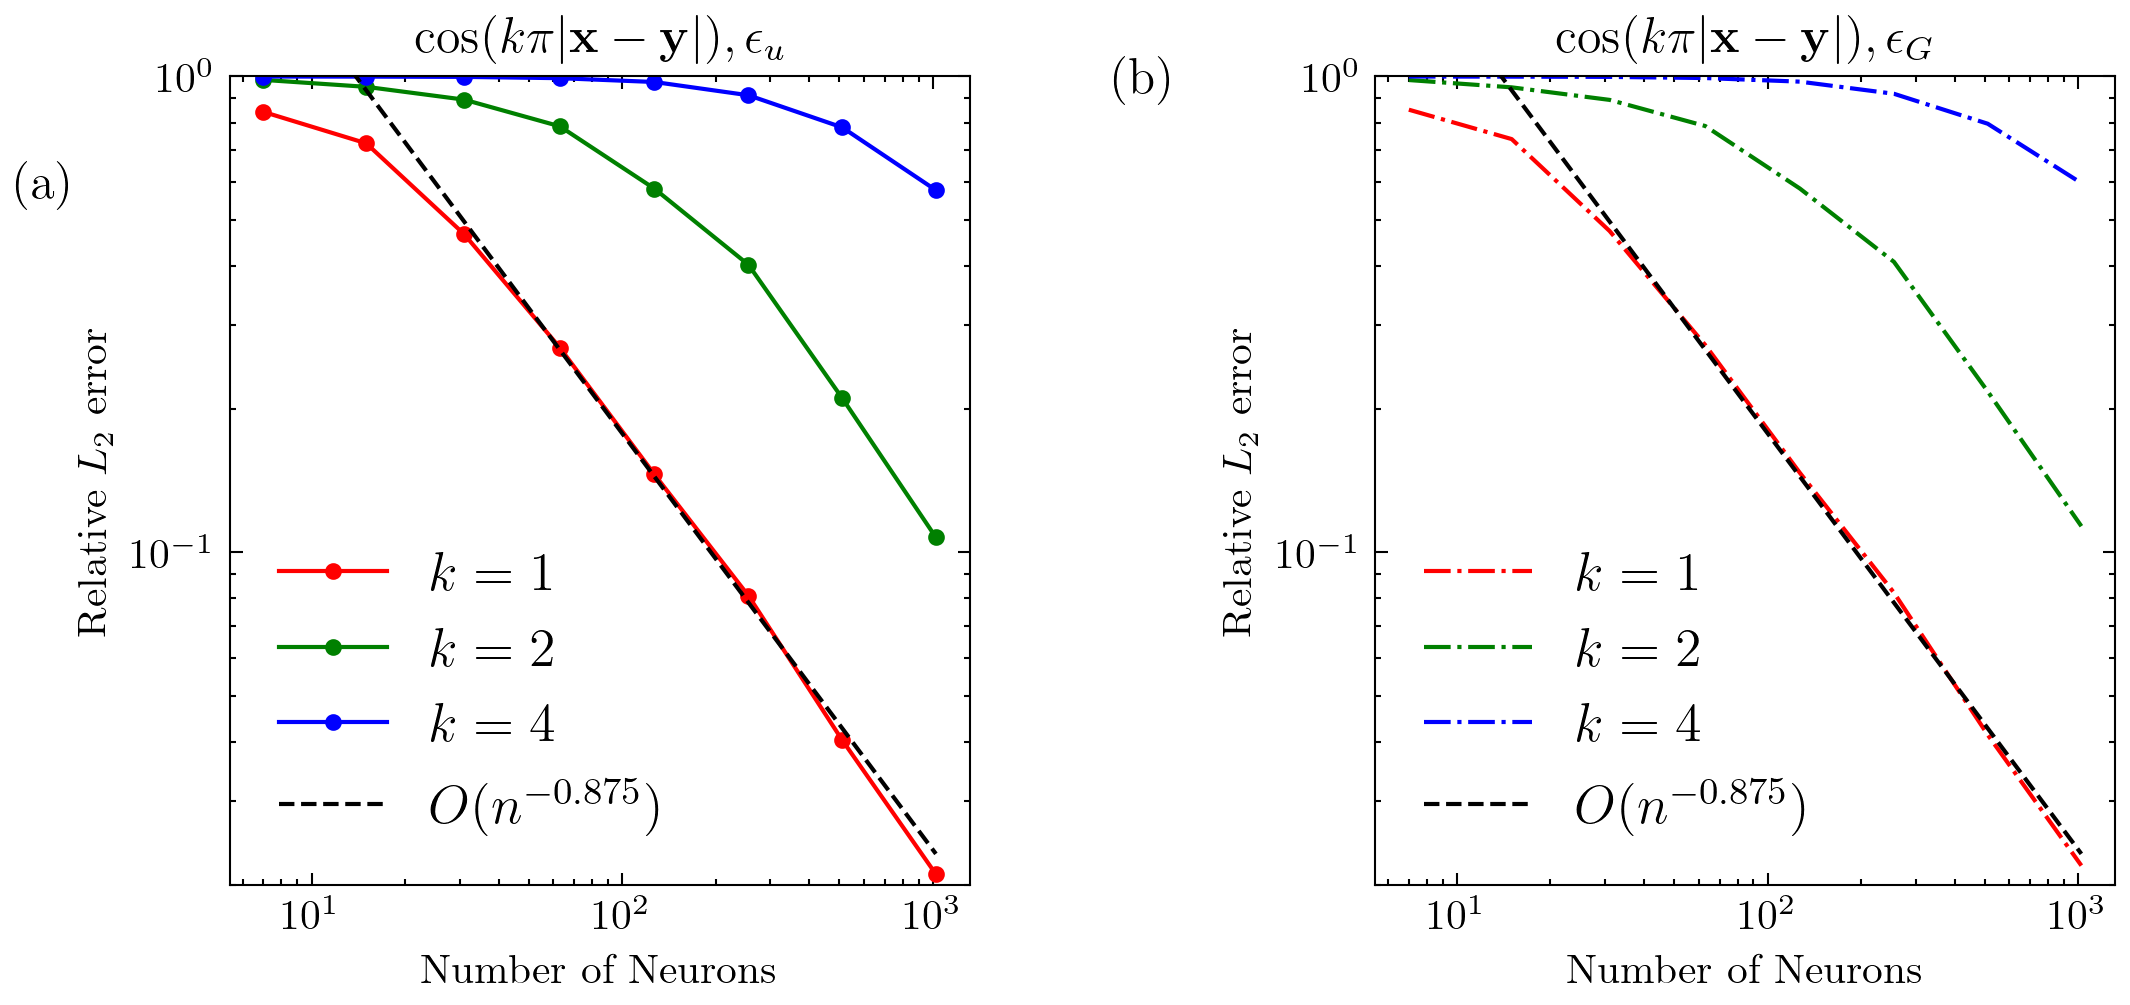

In [20]:
vis_oga_cos2D_dynamics('./cos2D_converge.pdf')

In [63]:
def vis_oga_2D_dynamics(outnm=None, sigma='2e-01'):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,2, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()

    poisson2D_logpath = f'../results/poisson2D/oga-1024-1000-512-20-x-{sigma}-relu/log.npy'
    helmholtz2D_logpath = f'../results/helmholtz2D/oga-1024-1000-512-20-x-{sigma}-relu/log.npy'
    poisson2Dh_logpath = f'../results/poisson2Dhdomain/oga-1024-1000-512-30-x-{sigma}-relu/log.npy'
    helmholtz2Dh_logpath = f'../results/helmholtz2Dhdomain/oga-1024-1000-512-30-x-{sigma}-relu/log.npy'
    
    poisson2D_log = np.load(poisson2D_logpath, allow_pickle=True).item()
    helmholtz2D_log = np.load(helmholtz2D_logpath, allow_pickle=True).item()
    poisson2Dh_log = np.load(poisson2Dh_logpath, allow_pickle=True).item()
    helmholtz2Dh_log = np.load(helmholtz2Dh_logpath, allow_pickle=True).item() 
    print(helmholtz2D_log['utest_rl2'].shape)   
    
    #####################
    ns = np.array([8, 16, 32, 64, 128, 256, 512, 1024])-1
    On = ns ** (-0.875)
    ax1.plot(ns, poisson2D_log['utest_rl2'][ns], '.-r', label='$\epsilon_u, \mathrm{Disk}$')
    # ax1.plot(ns, poisson2D_log['G_rl2'][ns], '-.r', label='$\epsilon_G, \mathrm{Disk}$')
    ns = np.array([8, 16, 32, 64, 128, 256, 512, 998])-1
    ax1.plot(ns, poisson2Dh_log['utest_rl2'][ns], '.-b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax1.plot(ns, 10.*On, '--k', label="$O(n^{-0.875})$") 
    ax1.set_ylim([0.02, 1])
    ax1.set_title('Poisson')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 9})
    label_a = Text(-0.2, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)
    print(poisson2D_log['utest_rl2'][ns])
    print(ns)
    
    On = ns ** (-0.875) 
    ns = np.array([8, 16, 32, 64, 128, 256, 512, 1024])-1
    ax2.plot(ns, helmholtz2D_log['utest_rl2'][ns], '.-r', label='$\epsilon_u, \mathrm{Disk}$')
    ns = np.array([8, 16, 32, 64, 128, 256, 512, 984])-1
    ax2.plot(ns, helmholtz2Dh_log['utest_rl2'][ns], '.-b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax2.plot(ns, 10.*On, '--k', label="$O(n^{-0.875})$")  
    ax2.set_ylim([0.02, 1]) 
    # ax3.set_ylim([helmholtz2Dh_log['utrain_rl2'].min()*0.9, 1])
    ax2.set_title('Helmholtz')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 9})
    label_b = Text(-0.2, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    def print_order(oga_url2, n=2048):
        print(oga_url2.shape)
        ord = np.arange(np.log2(n).astype(int))
        ord = 2**ord - 1

        ord_test = np.zeros_like(ord, dtype='float')
        ord_test[1:] = np.log2(oga_url2[ord][:-1] / oga_url2[ord][1:])

        for i, idx in enumerate(ord):
            if i != 0:
                row_str = "{:d} & {:.2f} \\\ ".format(ord[i]+1, ord_test[i])
                print(row_str)

    plt.savefig(outnm)

(1024,)
[0.69061622 0.59118783 0.45864928 0.38536177 0.32261657 0.25970191
 0.20878006 0.1756685 ]
[  7  15  31  63 127 255 511 997]


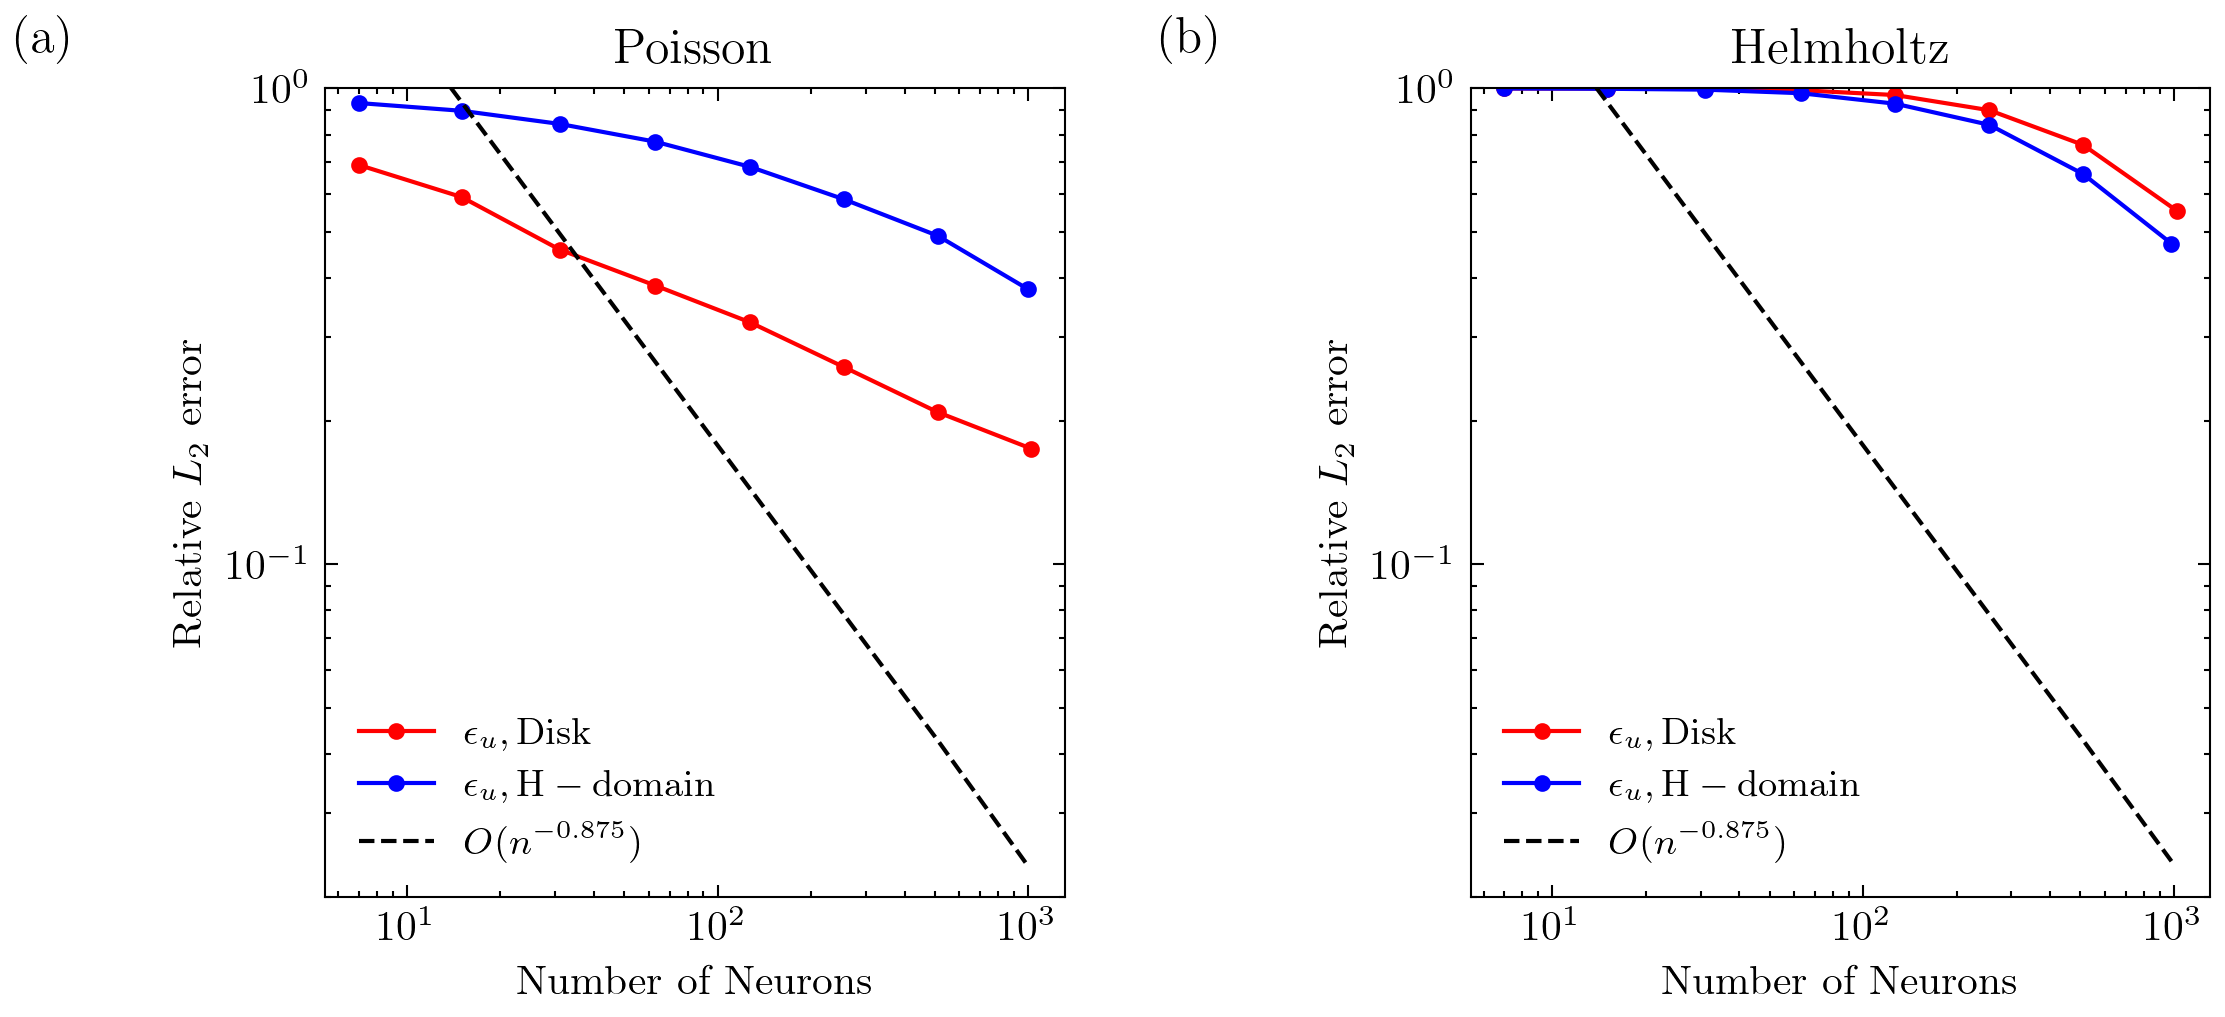

In [64]:
vis_oga_2D_dynamics('./poisson_helmholtz2D_converge.pdf', '2e-01')

In [82]:
def vis_ogapw_cos2D_dynamics(outnm=None, sigma='2e-01'):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,2, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()

    def load_data(task, param):
        fTrain, fTest, uTrain, uTest, X, Gref = load_cos2d_kernel_dataset(
            '../data', nTrain, nTest, n=param, res=20, sigma=sigma)
                
        url2s = []
        Grl2s = []
        ns = np.array([8, 16, 32, 64, 128])
        for n in ns:
            upredpath = f'../results/cos2D/ogapw-{n}-1000-512-20-{param}.0-{sigma}-relu/upred.npy'
            Gogapath = f'../results/cos2D/ogapw-{n}-1000-512-20-{param}.0-{sigma}-relu/Goga.npy'

            upred = np.load(upredpath, allow_pickle=True)
            url2 = relative_err(upred, uTest)
            url2s.append(url2)

            Gpred = np.load(Gogapath, allow_pickle=True)
            Grl2 = relative_err(Gpred, Gref)
            Grl2s.append(Grl2)
            print("n : {:} rl2 : {:.4e}".format(n, url2))
        
        return ns, np.array(url2s), np.array(Grl2s)

    ns, cos2Dpi_ulog, cos2Dpi_Glog = load_data('cos', 1)
    ns, cos2D2pi_ulog, cos2D2pi_Glog = load_data('cos', 2)
    ns, cos2D4pi_ulog, cos2D4pi_Glog = load_data('cos', 4)

    #####################
    On = ns ** (-1.25)
    ax1.plot(ns, cos2Dpi_ulog, '.-r', label='$k=1$')
    ax1.plot(ns, cos2D2pi_ulog, '.-g', label='$k=2$')
    ax1.plot(ns, cos2D4pi_ulog, '.-b', label='$k=4$')
    ax1.plot(ns, 10*On, '--k', label="$O(n^{-1.25})$")
    ax1.set_ylim([1e-4, 1])
    ax1.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \epsilon_u$')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 13})
    label_a = Text(-0.1, 0.8, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)
    
    ax2.plot(ns, cos2Dpi_Glog, '-.r', label='$k=1$')
    ax2.plot(ns, cos2D2pi_Glog, '-.g', label='$k=2$')
    ax2.plot(ns, cos2D4pi_Glog, '-.b', label='$k=4$')

    ax2.plot(ns, 10*On, '--k', label="$O(n^{-1.25})$")     
    ax2.set_ylim([1e-4, 1])
    ax2.set_title('$\cos(k \pi |\mathbf{x} - \mathbf{y}|), \epsilon_G$')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 13})
    label_b = Text(-0.15, 0.9, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    plt.savefig(outnm)


load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
n : 8 rl2 : 2.4416e-01
n : 16 rl2 : 9.6033e-02
n : 32 rl2 : 3.8283e-02
n : 64 rl2 : 1.4215e-02
n : 128 rl2 : 4.3225e-03
load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
n : 8 rl2 : 6.4010e-01
n : 16 rl2 : 3.5713e-01
n : 32 rl2 : 1.5982e-01
n : 64 rl2 : 6.3258e-02
n : 128 rl2 : 2.0162e-02
load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
n : 8 rl2 : 9.6071e-01
n : 16 rl2 : 8.3299e-01
n : 32 rl2 : 5.7145e-01
n : 64 rl2 : 2.9042e-01
n : 128 rl2 : 1.0246e-01


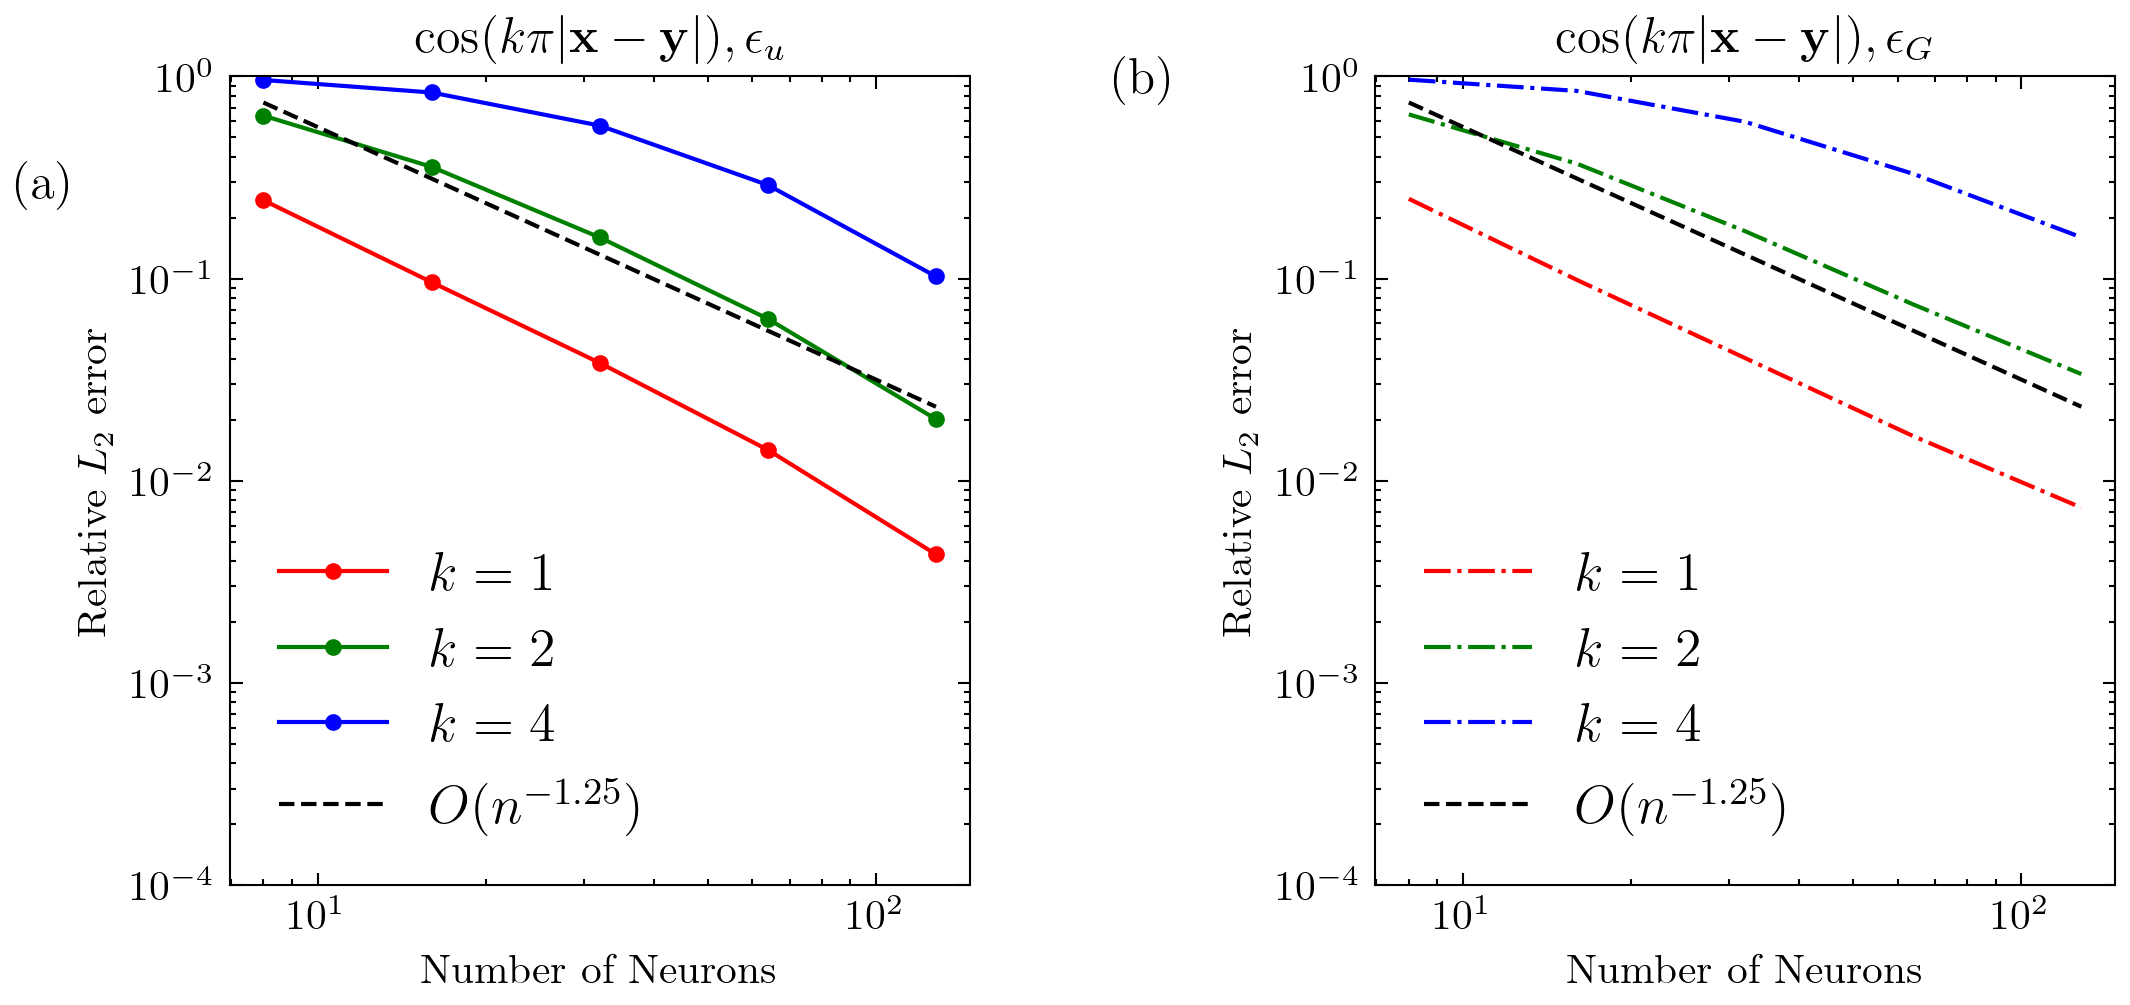

In [83]:
vis_ogapw_cos2D_dynamics('./cos2D_converge_pw.pdf', sigma='2e-01')

In [84]:
def vis_ogapw_2D_dynamics(outnm=None, sigma='2e-01'):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,2, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()

    def load_data(task, sigma='2e-01'):
        if task == 'poisson':
            fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
                '../data', nTrain, nTest, res=20, sigma=sigma)
        elif task == 'poisson_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
                '../data', nTrain, nTest, res=30, sigma=sigma)
        elif task == 'helmholtz':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
                '../data', nTrain, nTest, res=20, sigma=sigma)
        elif task == 'helmholtz_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
                '../data', nTrain, nTest, res=30, sigma=sigma)                
        url2s = []
        ns = np.array([8, 16, 32, 64, 128, 256, 512])
        for n in ns:
            if task == 'poisson':
                upredpath = f'../results/poisson2D/ogapw-{n}-1000-512-20-x-{sigma}-relu/upred.npy'
            elif task == 'poisson_h':
                upredpath = f'../results/poisson2Dhdomain/ogapw-{n}-1000-512-30-x-{sigma}-relu/upred.npy'
            elif task == 'helmholtz':
                upredpath = f'../results/helmholtz2D/ogapw-{n}-1000-512-20-x-{sigma}-relu/upred.npy'
            elif task == 'helmholtz_h':
                upredpath = f'../results/helmholtz2Dhdomain/ogapw-{n}-1000-512-30-x-{sigma}-relu/upred.npy'

            upred = np.load(upredpath, allow_pickle=True)
            url2 = relative_err(upred, uTest)
            url2s.append(url2)
            print("n : {:} rl2 : {:.4e}".format(n, url2))
        
        return ns, np.array(url2s)

        
    ns, poisson2D_log = load_data('poisson', sigma)
    ns, poisson2Dh_log = load_data('poisson_h')
    ns, helmholtz2D_log = load_data('helmholtz')
    ns, helmholtz2Dh_log = load_data('helmholtz_h')
    
    #####################
    On = ns ** (-1.25)
    ax1.plot(ns, poisson2D_log, '.-r', label='$\epsilon_u, \mathrm{Disk}$')
    ax1.plot(ns, poisson2Dh_log, '.-b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax1.plot(ns, 10.*On, '--k', label="$O(n^{-1.25})$") 
    ax1.set_ylim([1e-5, 1])
    ax1.set_title('Poisson')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 9})
    label_a = Text(-0.2, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)
    
    ax2.plot(ns, helmholtz2D_log, '.-r', label='$\epsilon_u, \mathrm{Disk}$')
    ax2.plot(ns, helmholtz2Dh_log, '.-b', label='$\epsilon_u, \mathrm{H-domain}$')
    ax2.plot(ns, 10.*On, '--k', label="$O(n^{-1.25})$")  
    ax2.set_ylim([1e-5, 1]) 
    ax2.set_title('Helmholtz')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 9})
    label_b = Text(-0.2, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)

    def print_order(oga_url2, n=2048):
        print(oga_url2.shape)
        ord = np.arange(np.log2(n).astype(int))
        ord = 2**ord - 1

        ord_test = np.zeros_like(ord, dtype='float')
        ord_test[1:] = np.log2(oga_url2[ord][:-1] / oga_url2[ord][1:])

        for i, idx in enumerate(ord):
            if i != 0:
                row_str = "{:d} & {:.2f} \\\ ".format(ord[i]+1, ord_test[i])
                print(row_str)

    plt.savefig(outnm)

load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
load ../data/poisson2D_disk_20_2e-01.mat
n : 8 rl2 : 3.5346e-01
n : 16 rl2 : 2.3352e-01
n : 32 rl2 : 1.6092e-01
n : 64 rl2 : 1.1002e-01
n : 128 rl2 : 6.1803e-02
n : 256 rl2 : 1.1655e-02
n : 512 rl2 : 8.5628e-04
load ../data/mesh2D_h_30.mat
load ../data/dat2D_h_30_2e-01.mat
load ../data/poisson2D_h_30_2e-01.mat


/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: divide by zero encountered in log
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))
/workdir/OGA-KernelEstimation/vis/../utils.py:39: RuntimeWarning: invalid value encountered in subtract
  Gref = (0.25/np.pi) * (np.log(a + b) - np.log(c + d))


n : 8 rl2 : 6.6342e-01
n : 16 rl2 : 4.7041e-01
n : 32 rl2 : 2.8413e-01
n : 64 rl2 : 1.3886e-01
n : 128 rl2 : 4.9355e-02
n : 256 rl2 : 8.3207e-03
n : 512 rl2 : 7.1716e-04
load ../data/mesh2D_disk_20.mat
load ../data/dat2D_disk_20_2e-01.mat
load ../data/helmholtz2D_disk_20_2e-01.mat
n : 8 rl2 : 9.1238e-01
n : 16 rl2 : 6.7764e-01
n : 32 rl2 : 3.9663e-01
n : 64 rl2 : 1.9574e-01
n : 128 rl2 : 9.0367e-02
n : 256 rl2 : 1.6107e-02
n : 512 rl2 : 1.6378e-04
load ../data/mesh2D_h_30.mat
load ../data/dat2D_h_30_2e-01.mat
load ../data/helmholtz2D_h_30_2e-01.mat
n : 8 rl2 : 8.5046e-01
n : 16 rl2 : 6.6481e-01
n : 32 rl2 : 3.5412e-01
n : 64 rl2 : 1.5604e-01
n : 128 rl2 : 6.2724e-02
n : 256 rl2 : 9.3052e-03
n : 512 rl2 : 6.1449e-04


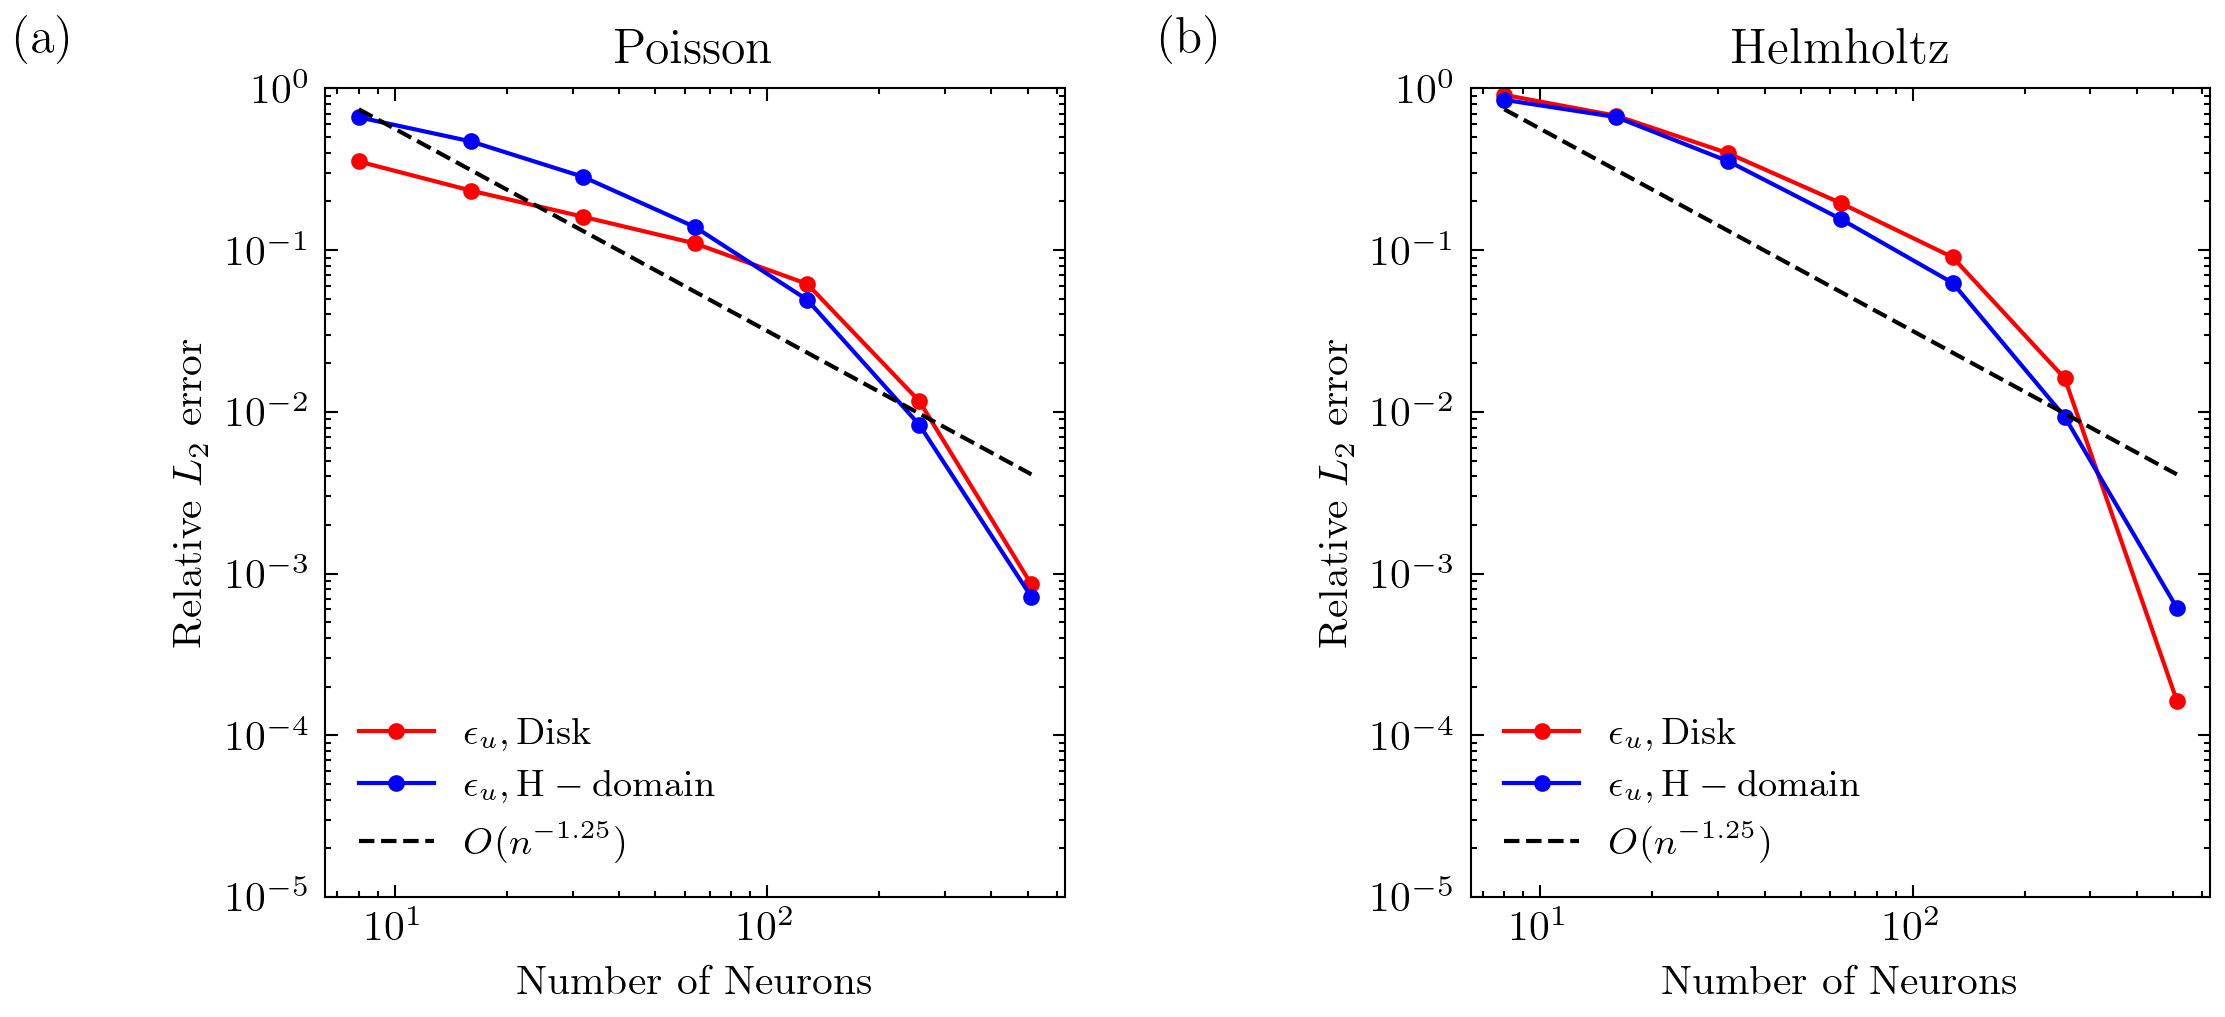

In [ ]:
vis_ogapw_2D_dynamics('./poisson_helmholtz2D_converge_pw.pdf', sigma='2e-01')

In [132]:
# def zeff(x, y, ax, ay, bx, by):
#     return (x < ax/16. and x > bx/16.0 and y < ay/16. and y > by/16.) * 9.0 + \
#            (x < by/16. and x > ay/16.0 and y < ax/16. and y > bx/16.) * 9.0 + \
#            1.0

def zeff(x, y, ax, ay, bx, by):
    return min((x < (ax+4.)/16. and x > ax/16.0 and y < (ay+4.)/16. and y > ay/16.) * 9.0 + \
           (x < (bx+4.)/16. and x > bx/16.0 and y < (by+4.)/16. and y > by/16.) * 9.0 + \
           1.0, 9.0)